In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Data Loading**

In [2]:
import zipfile

zip_file_path = '/content/drive/MyDrive/fraud_detection.zip'
extract_to_path = '/content/extracted'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")


Extraction complete.


In [3]:
import pandas as pd
df=pd.read_csv("/content/extracted/creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Exploratory Data Analysis**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
summary_stats


Summary Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


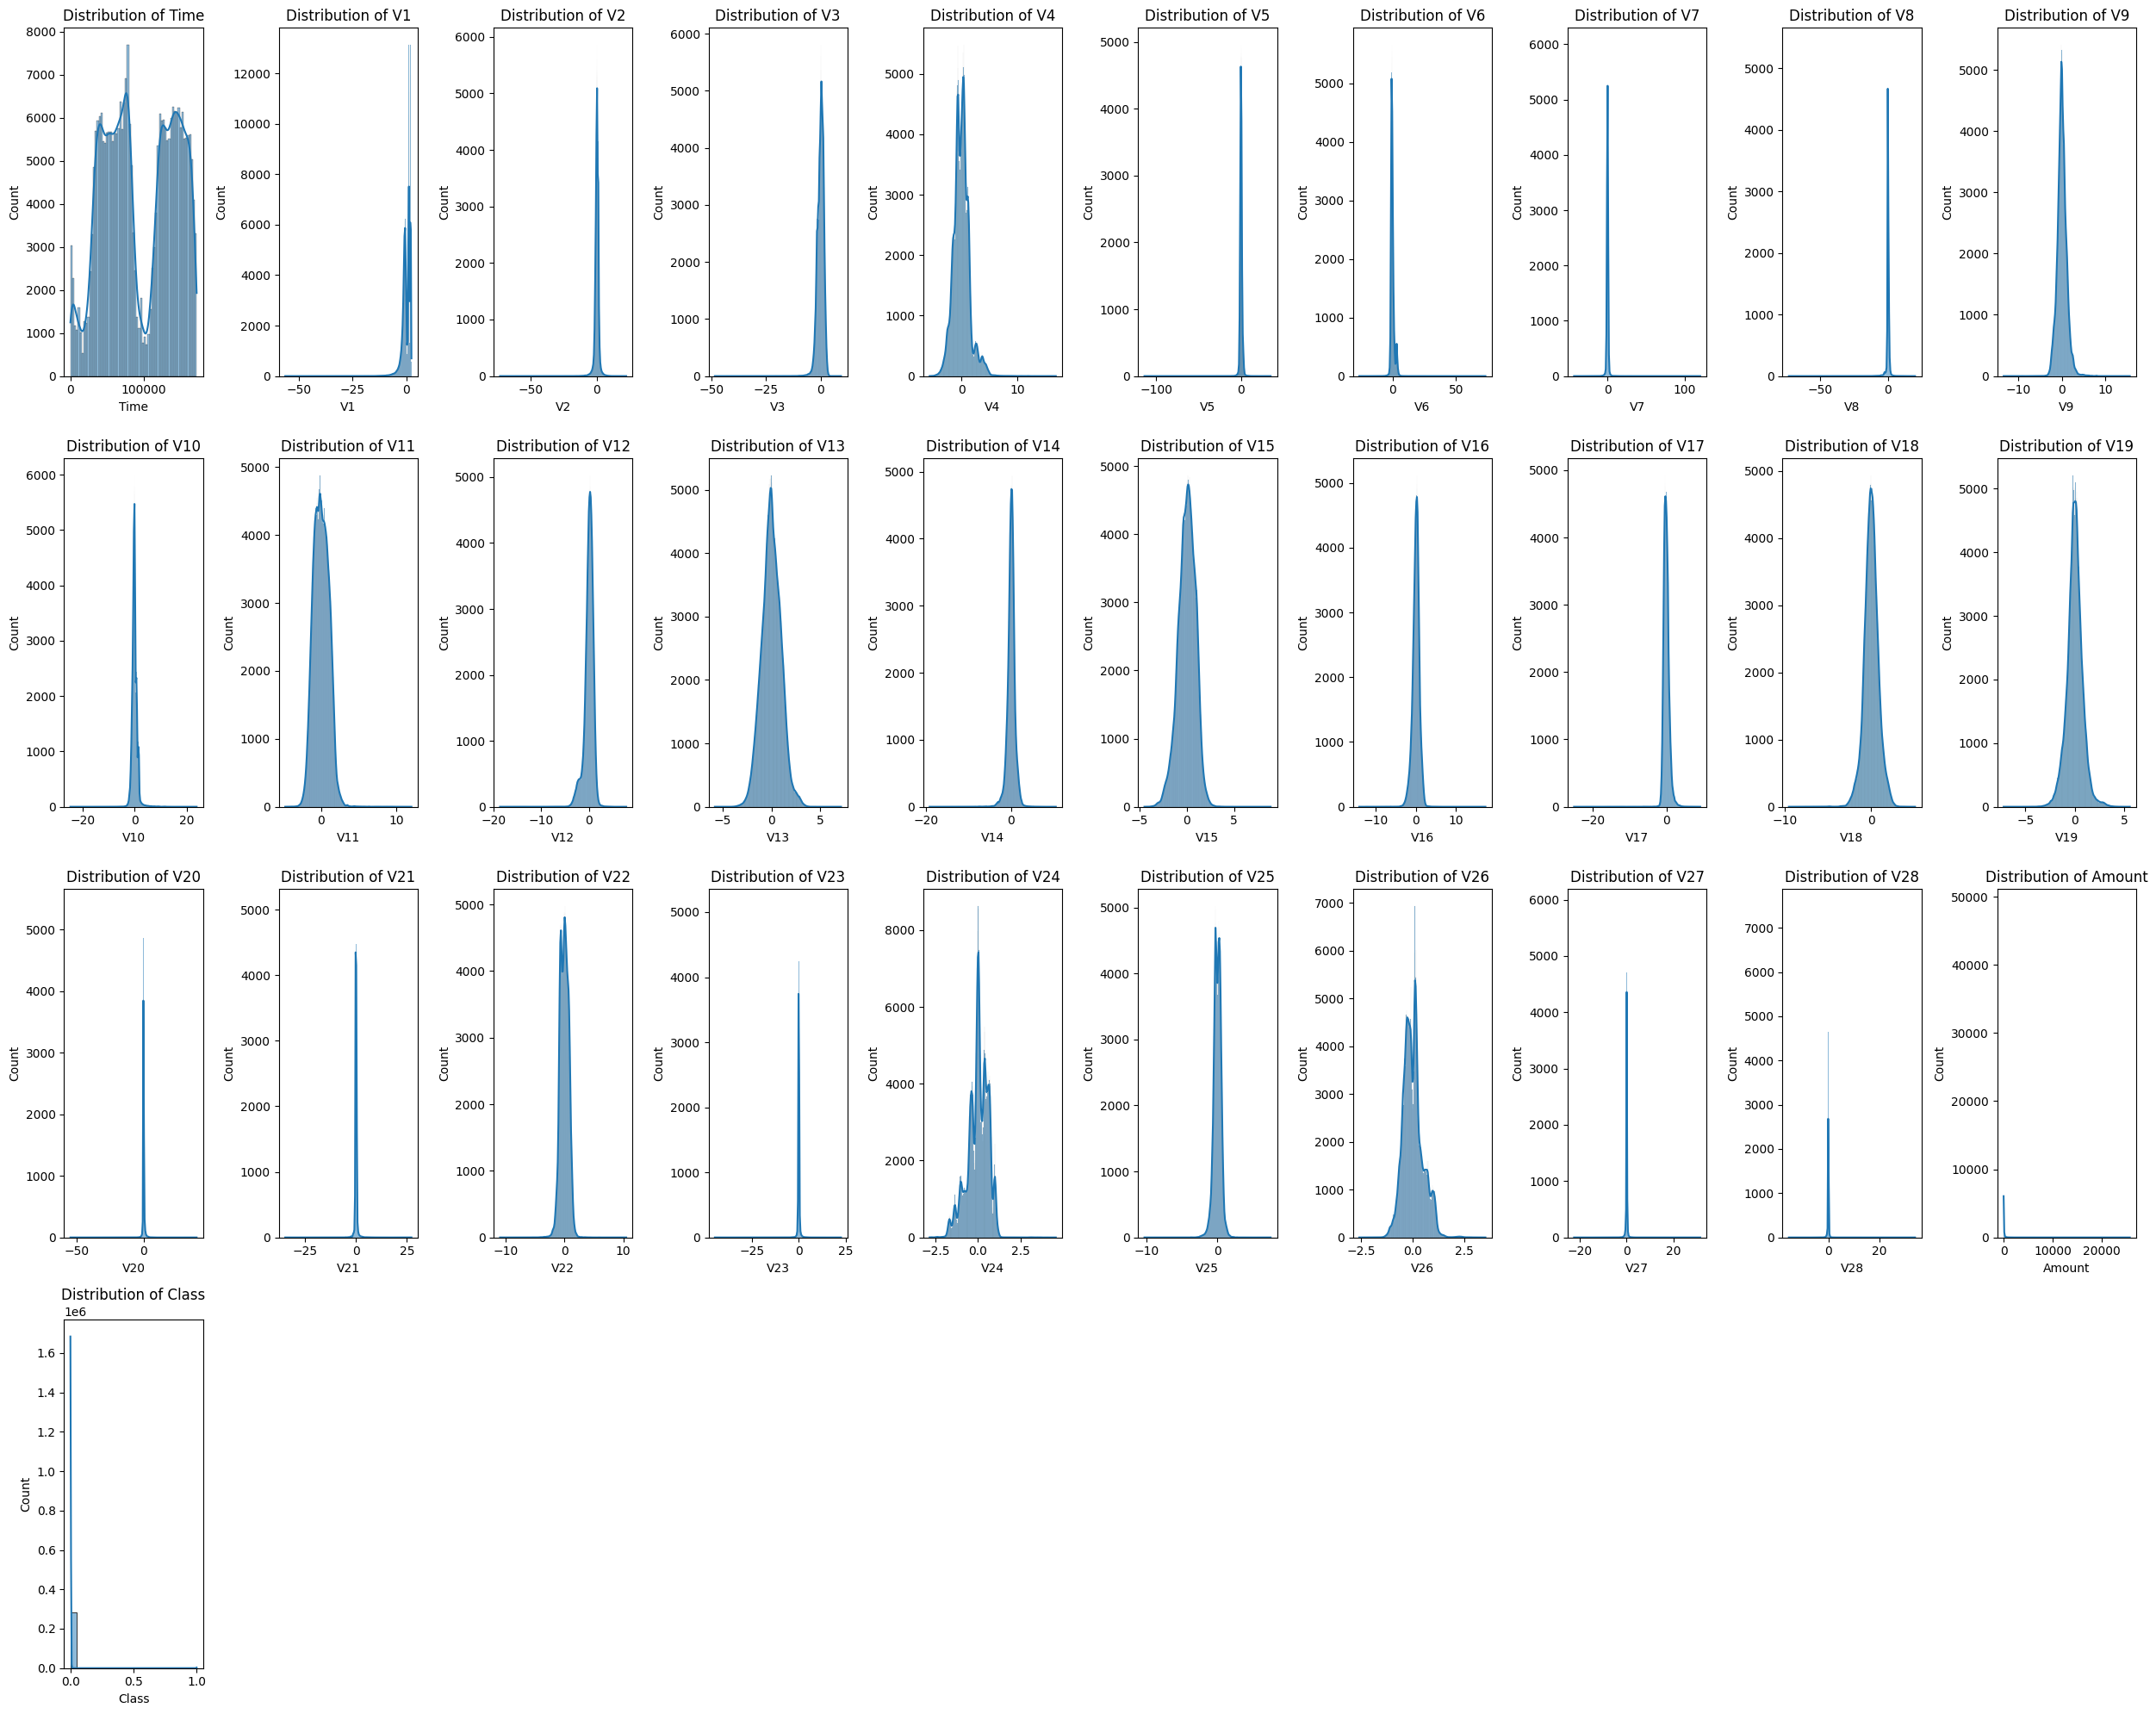

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_features)
num_cols = 10  # Number of columns for subplots
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


# **Initializing the Global Model**

In [7]:
import tensorflow as tf

# Define the architecture of the global model
def create_global_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the global model
def initialize_global_model(input_shape):
    global_model = create_global_model(input_shape)
    global_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    return global_model

# Define input shape based on the number of features in your dataset
input_shape = (30,)  # Assuming you have 30 features in your dataset

# Initialize the global model
global_model = initialize_global_model(input_shape)

# Print model summary
global_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Loading Client data**

In [8]:
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded into a DataFrame called 'df'

# Define the number of clients
num_clients = 3

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Calculate the number of rows per client
rows_per_client = len(df) // num_clients

# Create a list to hold dataframes for each client
client_dfs = []

# Distribute the data among clients
for i in range(num_clients):
    start_index = i * rows_per_client
    end_index = (i + 1) * rows_per_client if i < num_clients - 1 else len(df)
    client_df = df.iloc[start_index:end_index]
    client_dfs.append(client_df)

# Example output: print the number of rows for each client
for i, client_df in enumerate(client_dfs):
    print(f"Client {i+1} has {len(client_df)} rows.")


Client 1 has 94935 rows.
Client 2 has 94935 rows.
Client 3 has 94937 rows.


In [9]:
from IPython.display import display

# Display client data as DataFrame
for i, client_df in enumerate(client_dfs):
    print(f"Client {i+1} Data:")
    display(client_df.head())


Client 1 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,149487.0,0.066494,0.514866,-0.579907,-0.086939,0.843670,-0.005480,1.128850,-0.257029,-0.132532,...,-0.105600,-0.165410,0.199582,0.070776,-1.364918,0.226761,0.148730,0.262899,97.16,0
1,165844.0,-0.152516,0.316622,0.118999,-1.941851,-0.009947,-1.422418,0.921445,-0.689632,1.668418,...,0.248309,1.114293,-0.127203,0.485499,-0.470373,-0.210979,-0.570764,-0.077377,9.95,0
2,35713.0,1.078111,0.494721,-0.069212,2.345506,0.376358,-0.302096,0.564541,-0.147438,-1.337323,...,0.059007,-0.026809,-0.221401,0.006728,0.727464,0.063873,-0.055201,0.008886,71.28,0
3,137025.0,2.070477,-0.048950,-1.987942,0.329684,0.558171,-1.011409,0.588078,-0.487854,0.515866,...,0.264079,0.995547,-0.256462,-0.563546,0.673312,0.087492,-0.038929,-0.070307,37.17,0
4,121986.0,1.960232,0.008168,-1.583743,0.504966,0.005585,-1.301635,0.198470,-0.324685,0.955729,...,-0.221736,-0.419432,0.154904,-0.055321,-0.061943,-0.096042,-0.009605,-0.014725,41.00,0


Client 2 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94935,47071.0,1.200043,-1.004342,1.409449,-0.571182,-1.992589,-0.286785,-1.384890,0.214296,-0.353012,...,-0.087031,0.101728,0.067083,0.565189,-0.140321,1.083587,-0.017953,0.024026,45.90,0
94936,118848.0,1.459057,-1.333294,-0.700934,0.748127,-0.482157,0.682352,-0.323813,0.033462,1.362248,...,-0.111986,-0.622179,0.034461,0.089581,-0.418152,0.030252,-0.041166,0.014270,295.86,0
94937,138527.0,0.944744,-3.388638,-3.149731,-0.997089,-1.212165,-1.407467,0.869348,-0.710409,-2.249574,...,0.600719,0.530250,-0.775798,0.137378,0.296337,0.203141,-0.220317,0.026916,743.46,0
94938,127211.0,-0.768445,-0.278932,1.706255,-1.422341,-1.296945,-0.007007,-1.031907,0.742028,-0.864530,...,0.109103,0.548880,0.141187,0.013861,-1.060276,0.509707,0.067335,0.092936,38.90,0
94939,88824.0,1.978358,0.499335,-2.282759,1.373191,1.074394,-0.650150,0.599899,-0.211936,-0.195997,...,0.021648,0.245130,-0.006173,0.591824,0.457556,-0.543708,-0.003040,-0.030560,10.98,0


Client 3 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189870,89080.0,2.037193,-0.483070,-0.716818,0.249996,-0.259465,0.212318,-0.715919,0.116706,1.608243,...,0.131358,0.569732,0.070354,0.037917,-0.000638,-0.200737,0.031472,-0.038212,9.99,0
189871,12652.0,-0.353963,0.740200,1.720723,-0.300431,0.025967,-0.431881,0.366179,0.068516,1.303554,...,-0.158494,-0.312587,0.013022,-0.033132,-0.397654,0.015387,-0.013575,0.029637,6.99,0
189872,162948.0,-0.221009,1.095670,-0.680917,-0.458303,0.419676,-0.806871,0.544131,0.326017,0.018584,...,0.390564,1.172148,-0.031998,0.673355,-0.803261,-0.240450,0.374892,0.262206,0.89,0
189873,156336.0,-0.956471,0.848386,-0.310154,-2.572560,0.220677,-0.355532,-0.052855,-3.024000,-0.508800,...,2.149743,-0.325552,0.172870,0.709234,-0.292342,0.840010,-0.902100,-0.634324,2.98,0
189874,122431.0,0.090571,0.929722,0.026603,-0.757787,0.845393,-0.698959,1.085185,-0.232085,-0.179464,...,-0.291070,-0.600451,-0.025816,-0.628996,-0.355651,0.177063,0.253472,0.093125,4.99,0


## **Training Client Models for Collaborative Training**

In [10]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the parameters for the TensorFlow model
input_shape = (30,)  # Assuming input shape based on the number of features

# Create a function to define the architecture of the client model
def create_client_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create a list to hold trained models for each client
client_models = []

# Local training for each client
for i, client_df in enumerate(client_dfs):
    # Separate features and target variable
    X = client_df.drop(columns=['Class'])
    y = client_df['Class']

    # Initialize and train the client model
    client_model = create_client_model()
    client_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

    # Train the model
    client_model.fit(X, y, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed

    # Append the trained model to the list
    client_models.append(client_model)

    # Evaluate the model
    y_pred_prob = client_model.predict(X)  # Get predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get classes
    accuracy = accuracy_score(y, y_pred)

    # Print evaluation metrics
    print(f"Client {i+1}: Accuracy - {accuracy:.4f}")

# You may print other evaluation metrics as required.


Epoch 1/10
2967/2967 [==============================] - 8s 2ms/step - loss: 27.1492 - accuracy: 0.9957
Epoch 2/10
2967/2967 [==============================] - 8s 3ms/step - loss: 18.0157 - accuracy: 0.9963
Epoch 3/10
2967/2967 [==============================] - 6s 2ms/step - loss: 10.4810 - accuracy: 0.9959
Epoch 4/10
2967/2967 [==============================] - 8s 3ms/step - loss: 4.3533 - accuracy: 0.9961
Epoch 5/10
2967/2967 [==============================] - 6s 2ms/step - loss: 3.0874 - accuracy: 0.9955
Epoch 6/10
2967/2967 [==============================] - 8s 3ms/step - loss: 2.8621 - accuracy: 0.9957
Epoch 7/10
2967/2967 [==============================] - 6s 2ms/step - loss: 2.3438 - accuracy: 0.9962
Epoch 8/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.6695 - accuracy: 0.9969
Epoch 9/10
2967/2967 [==============================] - 7s 2ms/step - loss: 0.7995 - accuracy: 0.9959
Epoch 10/10
2967/2967 [==============================] - 5s 2ms/step
Client 1: 

# **Aggregating Client Gradients for Global Model Update**

In [11]:
import numpy as np

# Assuming 'client_models' contains the trained TensorFlow models for each client as created in the previous step

# Initialize an empty list to hold the gradients computed by each client
client_gradients = []

# Compute gradients for each client
for client_model in client_models:
    # Define a dummy input for the model
    dummy_input = tf.convert_to_tensor(np.zeros((1, 30)), dtype=tf.float32)

    # Compute gradients using GradientTape
    with tf.GradientTape() as tape:
        predictions = client_model(dummy_input, training=True)  # Assuming the model is callable with input
    gradients = tape.gradient(predictions, client_model.trainable_variables)

    client_gradients.append(gradients)

# Aggregate the gradients from all clients to update the global model
global_gradients = [tf.reduce_mean([client_gradients[i][j] for i in range(len(client_models))], axis=0)
                    for j in range(len(client_gradients[0]))]

# Update the global model parameters using the aggregated gradients (e.g., using gradient descent)
optimizer = tf.keras.optimizers.legacy.Adam()  # Use the legacy optimizer

# Iterate over layers of the global model and apply gradients
for grad, var in zip(global_gradients, global_model.trainable_variables):
    optimizer.apply_gradients([(grad, var)])

# After updating the global model, distribute the updated global model back to the clients for further training iterations.


# **Distributing Updated Global Model to Clients for Iterative Training**

In [12]:
# After updating the global model, distribute the updated global model back to the clients for further training iterations.
for client_model in client_models:
    # Copy the updated global model weights to the client model
    client_model.set_weights(global_model.get_weights())

# Now the updated global model has been distributed to all clients for further training iterations.

# **Training Client Models with Updated Global Model Weights**

In [13]:
# Train each client model with the updated global model weights
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable
    X = client_df.drop(columns=['Class'])
    y = client_df['Class']

    # Compile the client model with the same optimizer and loss as the global model
    client_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

    # Train the client model with the updated global model weights
    client_model.fit(X, y, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed

# After training the client models with the updated global model weights, repeat the process of computing gradients, updating the global model, and distributing the updated global model back to the clients for further training iterations.

Epoch 1/10
2967/2967 [==============================] - 8s 2ms/step - loss: 22.9882 - accuracy: 0.9957
Epoch 2/10
2967/2967 [==============================] - 7s 2ms/step - loss: 15.0948 - accuracy: 0.9962
Epoch 3/10
2967/2967 [==============================] - 6s 2ms/step - loss: 7.9479 - accuracy: 0.9957
Epoch 4/10
2967/2967 [==============================] - 8s 3ms/step - loss: 6.5926 - accuracy: 0.9955
Epoch 5/10
2967/2967 [==============================] - 6s 2ms/step - loss: 3.1869 - accuracy: 0.9956
Epoch 6/10
2967/2967 [==============================] - 8s 3ms/step - loss: 2.0231 - accuracy: 0.9964
Epoch 7/10
2967/2967 [==============================] - 6s 2ms/step - loss: 1.4749 - accuracy: 0.9964
Epoch 8/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.7425 - accuracy: 0.9963
Epoch 9/10
2967/2967 [==============================] - 6s 2ms/step - loss: 0.7910 - accuracy: 0.9964
Epoch 10/10
2967/2967 [==============================] - 8s 3ms/step - loss: 0.2

# **Model Evaluation**

In [14]:
from sklearn.metrics import classification_report

# Initialize a list to store evaluation results for each client model
client_evaluations = []

# Evaluate each client model
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable for evaluation
    X_eval = client_df.drop(columns=['Class'])
    y_eval = client_df['Class']

    # Predict classes using the client model
    y_pred = client_model.predict(X_eval)
    y_pred = (y_pred > 0.5).astype(int)  # Threshold probabilities to get classes

    # Compute evaluation metrics
    evaluation = classification_report(y_eval, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

    # Append evaluation results to the list
    client_evaluations.append(evaluation)

# Print evaluation results for each client model
for i, evaluation in enumerate(client_evaluations):
    print(f"Client {i+1} Model Evaluation:")
    print("F1 Score:", evaluation['weighted avg']['f1-score'])
    print("Recall:", evaluation['weighted avg']['recall'])
    # Print other metrics as needed
    print()  # Print an empty line for clarity


2967/2967 [==============================] - 6s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2967/2967 [==============================] - 4s 1ms/step
Client 1 Model Evaluation:
F1 Score: 0.9972090331284102
Recall: 0.9981250329172592

Client 2 Model Evaluation:
F1 Score: 0.9974252912667524
Recall: 0.9982830357613104

Client 3 Model Evaluation:
F1 Score: 0.9976464235057709
Recall: 0.9984305381463496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Initialize a list to store evaluation results for each client model
client_evaluations = []

# Evaluate each client model
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable for evaluation
    X_eval = client_df.drop(columns=['Class'])
    y_eval = client_df['Class']

    # Evaluate the client model
    evaluation = client_model.evaluate(X_eval, y_eval)

    # Append evaluation results to the list
    client_evaluations.append(evaluation)

# Print evaluation results for each client model
for i, evaluation in enumerate(client_evaluations):
    print(f"Client {i+1} Model Evaluation:")
    print("Loss:", evaluation[0])
    print("Accuracy:", evaluation[1])
    print()  # Print an empty line for clarity


2967/2967 [==============================] - 5s 2ms/step - loss: 0.0247 - accuracy: 0.9984
Client 1 Model Evaluation:
Loss: 0.4476200342178345
Accuracy: 0.9981250166893005

Client 2 Model Evaluation:
Loss: 0.016085172072052956
Accuracy: 0.9982830286026001

Client 3 Model Evaluation:
Loss: 0.024658141657710075
Accuracy: 0.9984305500984192



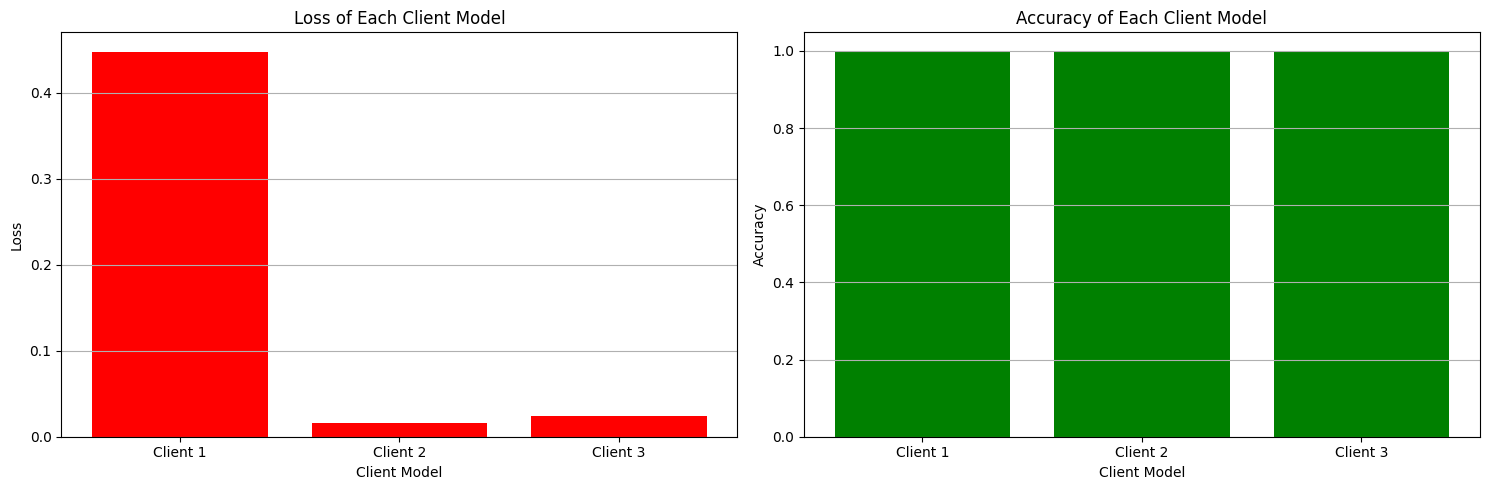

In [17]:
# Initialize lists to store evaluation results for each client model
loss_values = []
accuracy_values = []

# Extract evaluation metrics for each client
for evaluation in client_evaluations:
    # Extract loss and accuracy values from the evaluation tuple
    loss_values.append(evaluation[0])
    accuracy_values.append(evaluation[1])

# Create bar plots for loss and accuracy
plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(range(len(client_evaluations)), loss_values, color='red')
plt.xlabel('Client Model')
plt.ylabel('Loss')
plt.title('Loss of Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(range(len(client_evaluations)), accuracy_values, color='green')
plt.xlabel('Client Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

plt.tight_layout()
plt.show()
